# Using Graphiviz in Jupyter Notebook

In [1]:
import graphviz

## 1. Basic Usage

In [19]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()

In [20]:
# Add nodes 1 and 2
dot.node('1')
dot.node('2')

# Add edge between 1 and 2
dot.edges(['12'])

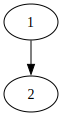

In [21]:
# Visualize the graph
dot

## 2. Preperation of Tree Nodes

In [22]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        

class Solution(object):
    def mergeTrees(self, t1, t2):
        """
        :type t1: TreeNode
        :type t2: TreeNode
        :rtype: TreeNode
        """
        
        if t1 and t2:
            # Merge the values from two trees
            node = TreeNode(t1.val + t2.val)
            
            # Merge the left trees using the function recursively
            node.left = self.mergeTrees(t1.left, t2.left)
            
            # Merge the right trees using the function recursively
            node.right = self.mergeTrees(t1.right, t2.right)
            
            return node
            
        else:
            return t1 or t2

In [ ]:
#   Tree 1 (t1)                    Tree 2 (t2)               
#         1                         2                             
#        / \                       / \                            
#       3   2                     1   3                        
#      /                           \   \                      
#     5                             4   7                  
#
#
#    Merged tree (merged_tree)
#             3
#            / \
#           4   5
#          / \   \ 
#         5   4   7

In [34]:
# Example 1

# Left tree
t1 = TreeNode(1)
t1.left = TreeNode(3)
t1.left.left = TreeNode(5)
t1.right = TreeNode(2)

# Right tree
t2 = TreeNode(2)
t2.left = TreeNode(1)
t2.left.right = TreeNode(4)
t2.right = TreeNode(3)
t2.right.right = TreeNode(7)

In [35]:
s = Solution()
merged_tree = s.mergeTrees(t1, t2)

## 3. Visualize Trees

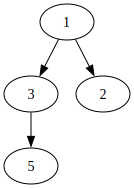

In [37]:
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('1')
dot.node('3')
dot.node('2')
dot.node('5')

# Add edges
dot.edges(['12', '13', '35'])

# Visualize the graph
dot

## 4. Programatic Creation

In [26]:
def visualize_tree(tree):
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot

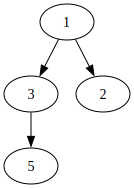

In [27]:
dot = visualize_tree(t1)

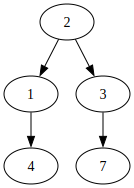

In [28]:
dot = visualize_tree(t2)

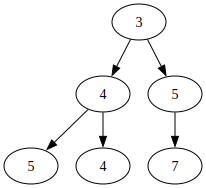

In [29]:
dot = visualize_tree(merged_tree)

In [30]:
# Save as svg file
dot.format = 'png'
dot.view(filename='digraph', directory='graphs/')

'graphs/digraph.png'